In [1]:
pip install tensorflow opencv-python matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

2024-08-09 10:10:23.696059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 10:10:23.838168: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 10:10:23.878012: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-09 10:10:24.159631: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-09 10:10:25.966460: W tensorflow/compiler/tf2

In [3]:
# VGG16 모델 로드 (사전 학습된 모델)
model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)


I0000 00:00:1723165828.783242     670 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723165829.198146     670 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723165829.198234     670 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.


I0000 00:00:1723165829.200926     670 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723165829.201014     670 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723165829.201071     670 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723165829.451743     670 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723165829.451841     670 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-09

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 이미지 로드 및 전처리
img_path = 'data/_test_10.png' # tf.keras.utils.get_file("elephant.jpg", "https://i.imgur.com/Bvro0YD.png")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (224, 224))
img_expanded = np.expand_dims(img_resized, axis=0)
img_preprocessed = tf.keras.applications.vgg16.preprocess_input(img_expanded)

In [9]:
# 수용 영역 계산
def get_receptive_field(layer_name, model):
    layer_dict = {layer.name: layer for layer in model.layers}
    layer = layer_dict[layer_name]
    layer_output = layer.output
    model_input = model.input

# layer_dict: 모델의 모든 레이어를 이름을 키로, 레이어 객체를 값으로 갖는 딕셔너리로  생성
  # -> 레이어의 이름을 사용하여 특정 레이어 객체 접근
# layer: 딕셔너리에서 주어진 layer_name에 해당하는 레이어 가져오기.
# layer_output: 해당 레이어의 출력
# model_input: 모델의 입력 레이어 = 네트워크의 입력 이미지


    grad_model = tf.keras.models.Model(inputs=model_input, outputs=layer_output)
    # 새롭게 정의된 모델
    # model_input을 입력으로 받고, 특정 레이어의 출력을 반환하는 모델

    feature_map = grad_model(img_preprocessed)
    # 주어진 입력 이미지(img_preprocessed)에 대해 grad_model을 통해 계산된 특정 레이어의 출력 특징 맵

    # 특징 맵의 크기
    feature_map_size = feature_map.shape[1:3]
    # 특징 맵의 크기(높이와 너비) 계산 = 해당 레이어의 뉴런들이 출력을 생성하는데 있어 참조하는 입력 이미지의 크기

    ### 수용 영역 계산
    layer_dict = {layer.name: layer for layer in model.layers}
    stride = 1
    receptive_field = 1  # 각 합성곱 레이어를 거치면서 해당 레이어가 커버하는 수용 영역의 크기를 점진적으로 계산
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Conv2D): # Conv2D (합성곱 레이어) 수용 영역 계산
            receptive_field = receptive_field + (layer.kernel_size[0] - 1) * stride
            # 현재 레이어의 필터 크기(커널 크기)를 사용하여 수용 영역 업데이트, 현재 레이어의 필터가 커지면 수용 영역 증가
            stride *= layer.strides[0]
            # 현재 레이어의 stride 값에 따라 전체 stride 값 업데이트, 스트라이드 값이 크면 수용 영역 증가
    return receptive_field, feature_map_size

In [18]:
# 수용영역 확인 레이어 선택
layer_name = 'block5_conv3'
# layer_name = 'block2_conv1'
receptive_field, feature_map_size = get_receptive_field(layer_name, model)

In [21]:
# 수용 영역 시각화
def visualize_receptive_field(img, receptive_field, feature_map_size):
    img_h, img_w, _ = img.shape
    fmap_h, fmap_w = feature_map_size

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img)

    step_x = img_w // fmap_w
    step_y = img_h // fmap_h

    for i in range(fmap_h):
        for j in range(fmap_w):
            y_start = i * step_y
            x_start = j * step_x
            rect = plt.Rectangle((x_start, y_start), receptive_field, receptive_field,
                                 linewidth=0.5, edgecolor='g', facecolor='none')
            ax.add_patch(rect)

    plt.title(f'Receptive Field: {receptive_field} x {receptive_field}')
    plt.show()

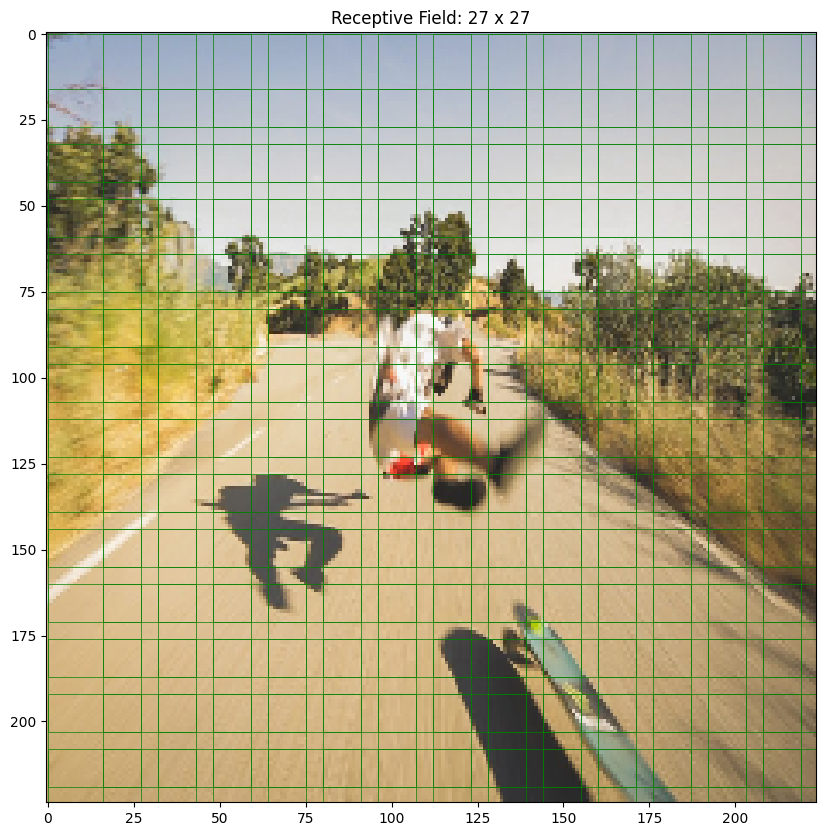

In [22]:
# 수용 영역 시각화
visualize_receptive_field(img_resized, receptive_field, feature_map_size)
